In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


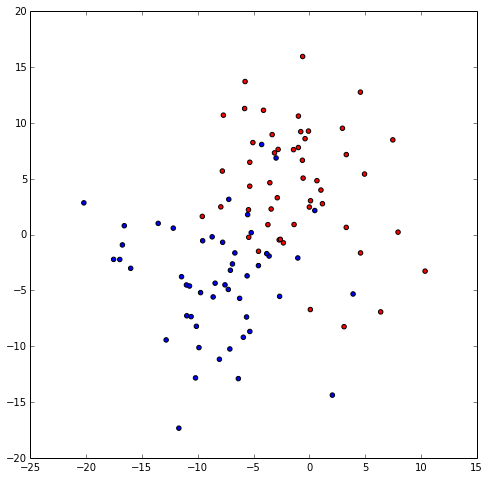

In [4]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [7]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [8]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [9]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [10]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [11]:
print(ridge_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [12]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [13]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [14]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [15]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [16]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
lr_predictions = log_regressor.predict(test_data)

In [18]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [19]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [20]:
print(lr_predictions)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [21]:
print(lr_proba_predictions)

[[ 0.99873457  0.00126543]
 [ 0.38956803  0.61043197]
 [ 0.45000737  0.54999263]
 [ 0.00536816  0.99463184]
 [ 0.70965944  0.29034056]
 [ 0.23304944  0.76695056]
 [ 0.98983143  0.01016857]
 [ 0.9709671   0.0290329 ]
 [ 0.93909394  0.06090606]
 [ 0.15103335  0.84896665]
 [ 0.90324667  0.09675333]
 [ 0.0100448   0.9899552 ]
 [ 0.82338574  0.17661426]
 [ 0.05238427  0.94761573]
 [ 0.00443451  0.99556549]
 [ 0.00102911  0.99897089]
 [ 0.20817393  0.79182607]
 [ 0.91074564  0.08925436]
 [ 0.22580526  0.77419474]
 [ 0.00101709  0.99898291]
 [ 0.09600944  0.90399056]
 [ 0.99367624  0.00632376]
 [ 0.9779897   0.0220103 ]
 [ 0.29889823  0.70110177]
 [ 0.00210487  0.99789513]
 [ 0.00929423  0.99070577]
 [ 0.2670277   0.7329723 ]
 [ 0.85210662  0.14789338]
 [ 0.98871444  0.01128556]
 [ 0.00407572  0.99592428]]


In [22]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8


In [23]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.866666666667


### Оценка качества по cross-validation

#### cross_val_score

In [24]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [25]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [26]:
lr_scoring

array([ 0.7,  0.9,  0.9,  0.9,  1. ,  1. ,  0.7,  0.9,  0.9,  0.8])

In [27]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


In [28]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8700000000000001, max:1.0, min:0.7, std:0.10049875621120892


#### cross_val_score с заданными scorer и cv_strategy

In [29]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [30]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [31]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [32]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [33]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.059535236998305825


In [34]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8766666666666667, max:1.0, min:0.7666666666666667, std:0.06155395104206462
